# RNN - IMDB Review
This project is to use RNN to explore the sentiment analysis using IMDB dataset.

Keras comes with few built-in datasets and IMDB review is one of them. It's easy to use this dataset as there is no text prepressing needed.

## Load and take a peak on IMDB dataset

More details of the dataset can be found [here](https://keras.io/datasets/)

In [30]:
import keras
import tensorflow as tf
import numpy as np
from keras import datasets, layers, utils

# To reproduce the same result
np.random.seed(0)
tf.set_random_seed(0)

print(tf.__version__)
print(keras.__version__)

1.3.0
2.0.8


In [31]:
dir(datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'boston_housing',
 'cifar',
 'cifar10',
 'cifar100',
 'imdb',
 'mnist',
 'reuters']

In [32]:
imdb = datasets.imdb
print(dir(imdb))
print(imdb.load_data.__doc__)

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_remove_long_seq', 'absolute_import', 'get_file', 'get_word_index', 'json', 'load_data', 'np', 'warnings', 'zip']
Loads the IMDB dataset.

    # Arguments
        path: where to cache the data (relative to `~/.keras/dataset`).
        num_words: max number of words to include. Words are ranked
            by how often they occur (in the training set) and only
            the most frequent words are kept
        skip_top: skip the top N most frequently occurring words
            (which may not be informative).
        maxlen: truncate sequences after this length.
        seed: random seed for sample shuffling.
        start_char: The start of a sequence will be marked with this character.
            Set to 1 because 0 is usually the padding character.
        oov_char: words that were cut out because of the `num_words`
            or `skip_top` limit will be replaced with this c

In [33]:
# Get the top 5000 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000, seed=0)
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)
X = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

Shape of x_train:  (25000,)
Shape of y_train:  (25000,)
Shape of x_test:  (25000,)
Shape of y_test:  (25000,)


In [34]:
# Get the word to index of IMDB, then convert it to index to word
word_index = imdb.get_word_index()
index_word = {v:k for k, v in word_index.items()}

# Convert the index to word, not so readable, but this is how NLP works
restore_word = [index_word[i] for i in X[0]]
print("Index:\n", X[0])
print("Word:\n", ' '.join(restore_word))

Index:
 [1, 4078, 2, 9, 448, 725, 4, 2, 241, 2, 241, 38, 111, 2, 500, 40, 91, 374, 500, 679, 102, 13, 62, 135, 4, 2159, 92, 2, 83, 6, 275, 3449, 66, 73, 5, 15, 271, 18, 14, 31, 99, 2149, 10, 10, 225, 6, 184, 196, 2, 63, 2568, 5, 732, 4, 863, 18, 4, 65, 5, 4, 1397, 1111, 23, 63, 6, 564, 4892, 2, 5, 27, 476, 577, 2, 2, 2, 5, 492, 2, 2, 2, 216, 8, 847, 83, 4, 2, 92, 168, 32, 99, 2575, 5, 515, 195, 481, 2017, 9, 348, 44, 4, 2, 23, 4, 1111, 8, 789, 2, 280, 4, 2, 517, 2, 10, 10, 1958, 5, 1364, 183, 380, 8, 140, 2, 5, 263, 2, 140, 23, 6, 1973, 3318, 187, 4, 3450, 8, 1974, 618, 51, 9, 1448, 23, 14, 2, 1111, 19, 94, 680, 2, 21, 11, 882, 25, 80, 24, 1414, 19, 803, 170, 23, 17, 2, 5, 2447, 2953, 79, 1376, 11, 8, 2, 4, 114, 60, 53, 51, 16, 66, 3742, 12, 83, 4, 2, 7, 78, 212, 26, 94, 2, 1815, 2611, 46, 7, 4, 2, 388, 63, 43, 2266, 2, 2, 33, 94, 2099, 3002, 366, 45, 1852, 76, 303, 45, 31, 155, 269, 8, 216, 56, 5, 984, 142, 1393, 21, 160, 155, 399, 12, 4521, 5, 19, 2, 2380, 10, 10, 466, 12, 2, 11, 467

## Preprocessing

In [35]:
# The max and min length of a review in terms of the count of words
print("Max length of a review: ", max(len(str) for str in X))
print("Min length of a review: ", min(len(str) for str in X))

# Let's use 300 as the cut-off value
max_words = 300
gt300 = sum(len(str) > max_words for str in X)
print("There are {:.0%}".format(gt300/len(X)), "of reviews are more than", max_words, "words")

Max length of a review:  2494
Min length of a review:  7
There are 23% of reviews are more than 300 words


In [36]:
# Padding or truncating the reviews to limit it to 300 words
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=max_words)

# A sample of padding at the end
print(X[2])
print(y[2])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    1   14    9
   31    7  148  102  198  269    8   30 4378    5 3094    5  305  630   56
    2   32  120  410  260  110   12   33    6    2   22 1413   13   16 3704
   34    4  

## Build and train the model

In [41]:
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Dropout, Input
from keras.layers.embeddings import Embedding
from keras.optimizers import RMSprop, Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LambdaCallback, EarlyStopping
from sklearn.model_selection import train_test_split
import keras.backend as K

#X = X.reshape(X.shape[0], X.shape[1], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)


(35000, 300)
(15000, 300)


In [42]:
# Size of the vacabulary
num_top_words = 5000
# Output Embedding dimension
embedding_vector_len = 64

inp = Input(shape=(X_train.shape[1],))
x = Embedding(num_top_words, embedding_vector_len, input_length=max_words)(inp)
x = LSTM(100, return_sequences=True)(x)
x = LSTM(100)(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inp, outputs=output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 300)               0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 300, 64)           320000    
_________________________________________________________________
lstm_9 (LSTM)                (None, 300, 100)          66000     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 466,501
Trainable params: 466,501
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Even though below callback may not be necessary, still included in this project
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, min_lr=0.0001)
lr_print = LambdaCallback(on_epoch_begin=lambda epoch,logs: print("lr:", K.eval(model.optimizer.lr)))
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,mode='auto')
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True)

filepath = 'IMDB.h5'
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [44]:
history = model.fit(X_train, y_train, epochs=3, batch_size = 100,
                    callbacks=[checkpoint, reduce_lr, lr_print, early_stopping],
                    validation_split=0.2)

Train on 28000 samples, validate on 7000 samples
lr: 0.001
Epoch 1/3
28000/28000 [==============================] - 274s - loss: 0.4727 - acc: 0.7784 - val_loss: 0.3367 - val_acc: 0.8551
lr: 0.001
Epoch 2/3
28000/28000 [==============================] - 290s - loss: 0.3403 - acc: 0.8623 - val_loss: 0.3057 - val_acc: 0.8726
lr: 0.001
Epoch 3/3
28000/28000 [==============================] - 333s - loss: 0.2801 - acc: 0.8890 - val_loss: 0.2836 - val_acc: 0.8850


## Plot the training, validation and test accuracy

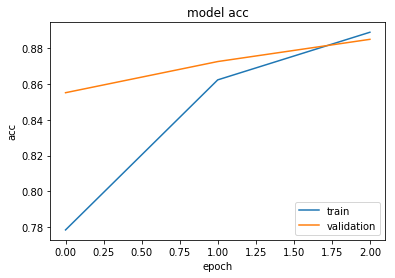

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)
    
plot_train(history)

In [51]:
# Test against X_test and y_test dataset.
from keras.models import load_model
model = load_model('IMDB.h5')
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.295858772373
Test accuracy: 0.880800000032


## What about model without embedding?

In [58]:
X_train2 = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test2 = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
inp = Input(shape=(X_train2.shape[1], X_train2.shape[2]))
#x = Embedding(num_top_words, embedding_vector_len, input_length=max_words)(inp)
x = LSTM(100, return_sequences=True)(inp)
x = LSTM(100)(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inp, outputs=output)
model.summary()

(35000, 300, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 300, 1)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 300, 100)          40800     
_________________________________________________________________
lstm_15 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Even though below callback may not be necessary, still included in this project
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, min_lr=0.0001)
lr_print = LambdaCallback(on_epoch_begin=lambda epoch,logs: print("lr:", K.eval(model.optimizer.lr)))
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,mode='auto')
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True)

filepath = 'IMDB_wo_embedding.h5'
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train2, y_train, epochs=3, batch_size = 100,
                    callbacks=[checkpoint, reduce_lr, lr_print, early_stopping],
                    validation_split=0.2)

Train on 28000 samples, validate on 7000 samples
lr: 0.001
Epoch 1/3
21100/28000 [=====================>........] - ETA: 65s - loss: 0.6968 - acc: 0.5134

In [ ]:
plt_train(history)
model = load_model('IMDB_wo_embedding.h5')
score = model.evaluate(X_test2, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])